<img src="https://designguide.ku.dk/download/co-branding/ku_logo_uk_h.png" alt="University logo" width="300" align="right"/>

## Language Processing 1

### Session 9 (part 1)

##### Manex Agirrezabal



### In the previous classes

We learned about:

 * Lexical semantics
 * WordNet

### In this class:

I would like you to learn about:

  * One-hot vector representation
  * Term-Document and Term-Term matrices
  * TF-IDF representation
  * Intuition of vector semantics

We are trying to model the meaning of a word/sentence/document

We saw one model to represent meaning: Lexical databases

We can now make inferences.

Example: `I ate a banana`

Questions that we can answer and inferences we can make.

  * What is a banana?

  * Is there something else that I can eat? hypernym of banana, and hyponyms.

Example: `We could hear somebody snoring`

  * Somebody was sleeping

But how do we express these ideas in practice? WordNet and other ontologies are ways of representing this meaning.

Sometimes, though, simpler representations can be enough.



### Example: nice/rude classification

Imagine you want to create a classifier to predict whether a person is talking nice or rude, each time that the person says one word.

You have several pieces of information (5 features):

  * average eye brow position
  * average eye position
  * average lip position (left corner, center, right corner)

But now we want to include as well, the word that a person is saying. The data would look like this, approximately:

In [15]:
import numpy as np
import pandas as pd

from nltk.tokenize import word_tokenize

In [16]:
dataset = np.random.random((20,5))
dataset

array([[8.84540781e-01, 1.28751647e-01, 8.98362910e-02, 8.95589033e-02,
        2.27882303e-01],
       [5.92140339e-01, 3.32966372e-01, 3.95572616e-02, 1.60977227e-01,
        7.14676084e-01],
       [9.80578013e-01, 6.94495905e-01, 8.14375439e-01, 2.93251059e-01,
        9.35044801e-01],
       [8.77050549e-01, 4.17194799e-01, 1.36597856e-01, 3.71488264e-01,
        7.18024079e-01],
       [7.44982172e-01, 2.60618804e-01, 5.57719776e-01, 9.21031341e-01,
        3.66783701e-02],
       [7.50913779e-01, 7.76575688e-01, 7.04515947e-01, 9.33676421e-01,
        7.53222944e-01],
       [9.45613785e-01, 9.52869929e-01, 4.68716409e-01, 4.40538803e-04,
        2.17316596e-01],
       [3.62863403e-01, 9.28903041e-01, 3.53437708e-01, 9.11303814e-01,
        7.09556814e-01],
       [8.63016637e-01, 3.79983298e-01, 2.07272666e-01, 2.88313934e-01,
        4.16470019e-01],
       [2.91256012e-02, 2.88945257e-01, 4.32209759e-01, 6.52746430e-02,
        3.85702520e-01],
       [7.05441798e-01, 1.0353

In [17]:
words = "And then, after a really horrible time, a wonderful blissfull time started for the queen of hearts."
tokens = word_tokenize(words.lower())
tokens

['and',
 'then',
 ',',
 'after',
 'a',
 'really',
 'horrible',
 'time',
 ',',
 'a',
 'wonderful',
 'blissfull',
 'time',
 'started',
 'for',
 'the',
 'queen',
 'of',
 'hearts',
 '.']

In [18]:
pd.concat([pd.DataFrame(dataset),pd.Series(tokens)],axis=1,ignore_index=True).rename(columns={0: 'eyebrow', 1:"eye",2:"lipl",3:"lipc",4:"lipr",5:"word"})

,eyebrow,eye,lipl,lipc,lipr,word
0,0.884541,0.128752,0.089836,0.089559,0.227882,and
1,0.592140,0.332966,0.039557,0.160977,0.714676,then
2,0.980578,0.694496,0.814375,0.293251,0.935045,","
3,0.877051,0.417195,0.136598,0.371488,0.718024,after
4,0.744982,0.260619,0.557720,0.921031,0.036678,a
5,0.750914,0.776576,0.704516,0.933676,0.753223,really
6,0.945614,0.952870,0.468716,0.000441,0.217317,horrible
7,0.362863,0.928903,0.353438,0.911304,0.709557,time
8,0.863017,0.379983,0.207273,0.288314,0.416470,","
9,0.029126,0.288945,0.432210,0.065275,0.385703,a


But, if we want to train a Perceptron, we need everything to be encoded as numbers.

<center>How can we do that?</center>

A very simple representation is a One-Hot Encoding.

It represents a word using a vector of zeros, and one single element at the $i$-th index has a value of 1.

When we define a one-hot vector, there must be an associated dictionary that will associate the indices of the vector with actual values that we want to represent.

Can you create a dictionary from the tokens variable?

In [19]:
#YOUR CODE HERE

{',',
 '.',
 'a',
 'after',
 'and',
 'blissfull',
 'for',
 'hearts',
 'horrible',
 'of',
 'queen',
 'really',
 'started',
 'the',
 'then',
 'time',
 'wonderful'}

Usually, we would build a variable to convert from words to indices (`w2idx`) and viceversa (`idx2w`). And for that, we can use dict comprehension (very similar to list comprehension).

In [20]:
#YOUR CODE HERE

{',': 0,
 '.': 1,
 'a': 2,
 'after': 3,
 'and': 4,
 'blissfull': 5,
 'for': 6,
 'hearts': 7,
 'horrible': 8,
 'of': 9,
 'queen': 10,
 'really': 11,
 'started': 12,
 'the': 13,
 'then': 14,
 'time': 15,
 'wonderful': 16}

In [21]:
#YOUR CODE HERE


{0: ',',
 1: '.',
 2: 'a',
 3: 'after',
 4: 'and',
 5: 'blissfull',
 6: 'for',
 7: 'hearts',
 8: 'horrible',
 9: 'of',
 10: 'queen',
 11: 'really',
 12: 'started',
 13: 'the',
 14: 'then',
 15: 'time',
 16: 'wonderful'}

Reflect a bit: Why do we need both `w2idx` and `idx2w`?

Now we need to create a vector of zeros of the length of the vocabulary, and make sure that each word gets a one in their right index.

Can you do that?

In [22]:


def one_hot_vec (word):
    #YOUR CODE HERE
    #(you need to use the dictionary w2idx)

In [23]:
one_hot_vec("and")

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
one_hot_vec("a")

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
one_hot_vec("horrible")

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

What are the benefits/disadvantages of representing our features as vectors instead of as unique IDs?

Is everything good/bad?

  * Dimensionality
    * 50,000 words in the vocabulary, then, 50,000 features
    * can be computationally expensive
  * Relation between different instances
    * Dog, cat and table... There is the same distance between all these elements
    * low generalization power


Check discussion in section 3 from Goldberg (2016)

Goldberg, Y. (2016). A primer on neural network models for natural language processing. Journal of Artificial Intelligence Research, 57, 345-420.

But if we want to make any inference about a word, we need to go a bit further.

#### Let's start building Term-Document matrices

If we use the words in documents, we can use the information of the document itself to help better represent the word. Let's see one example from SLP3.

In [26]:
import pandas as pd
import numpy as np

This is a **TERM-DOCUMENT** matrix.

In [27]:
a=[[1,1,8,15],[2,2,12,36],[37,58,1,5],[6,117,0,0]]
word_doc_mat = pd.DataFrame(a,index=['battle', 'soldier', 'fool','clown'], columns=['As You Like It', 'Twelfth Night', 'Julius Caesar', 'Henry V'])
word_doc_mat

,As You Like It,Twelfth Night,Julius Caesar,Henry V
battle,1,1,8,15
soldier,2,2,12,36
fool,37,58,1,5
clown,6,117,0,0


I would like to focus on two words: fool and soldier

In [28]:
word_doc_mat.loc[["fool","soldier"]]

,As You Like It,Twelfth Night,Julius Caesar,Henry V
fool,37,58,1,5
soldier,2,2,12,36


In [29]:
from matplotlib import pyplot as plt
%matplotlib inline

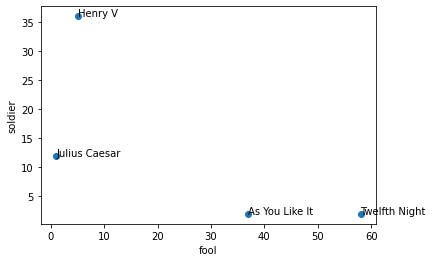

In [31]:
x,y = word_doc_mat.loc[["fool","soldier"]].values
plt.scatter(x,y)
for label in word_doc_mat.columns:
    plt.annotate (label, xy = word_doc_mat.loc[["fool","soldier"]][label].values)
    
plt.xlabel("fool")
plt.ylabel("soldier");

Anything special about this plot?

Why are "As you like it" and "Twelfth Night" on the lower right part?

<img src="11-shak02.png"/>

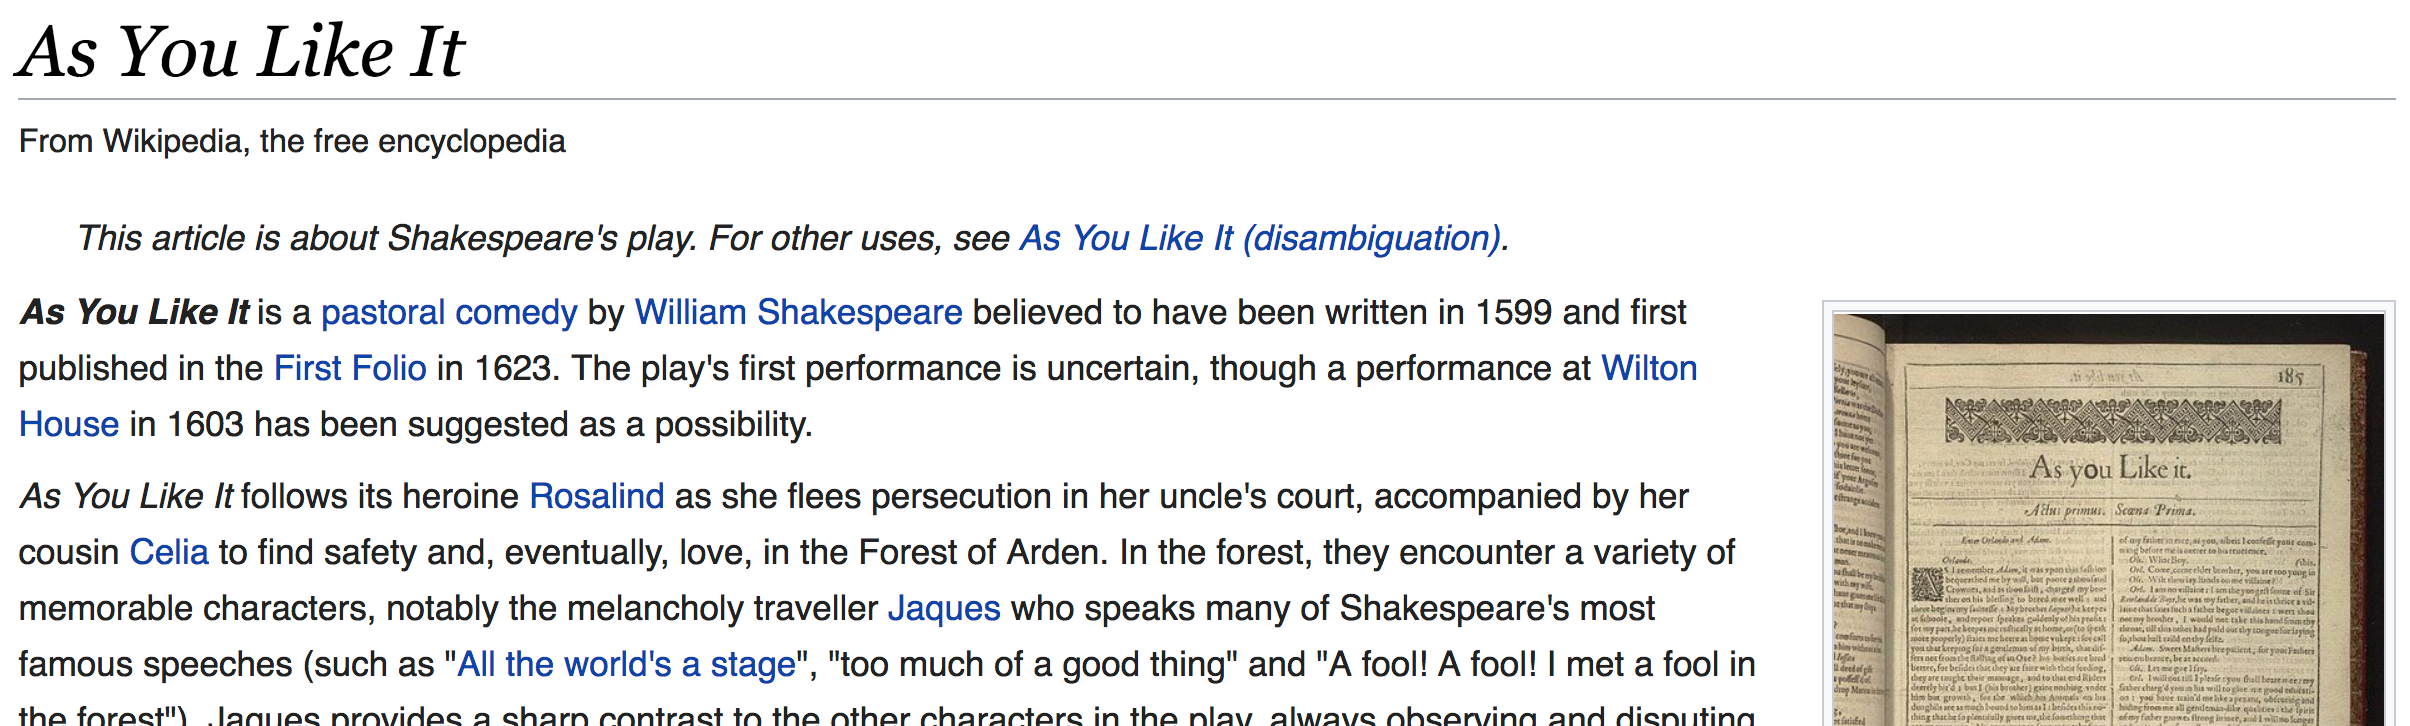

<img src="11-shak01.png"/>

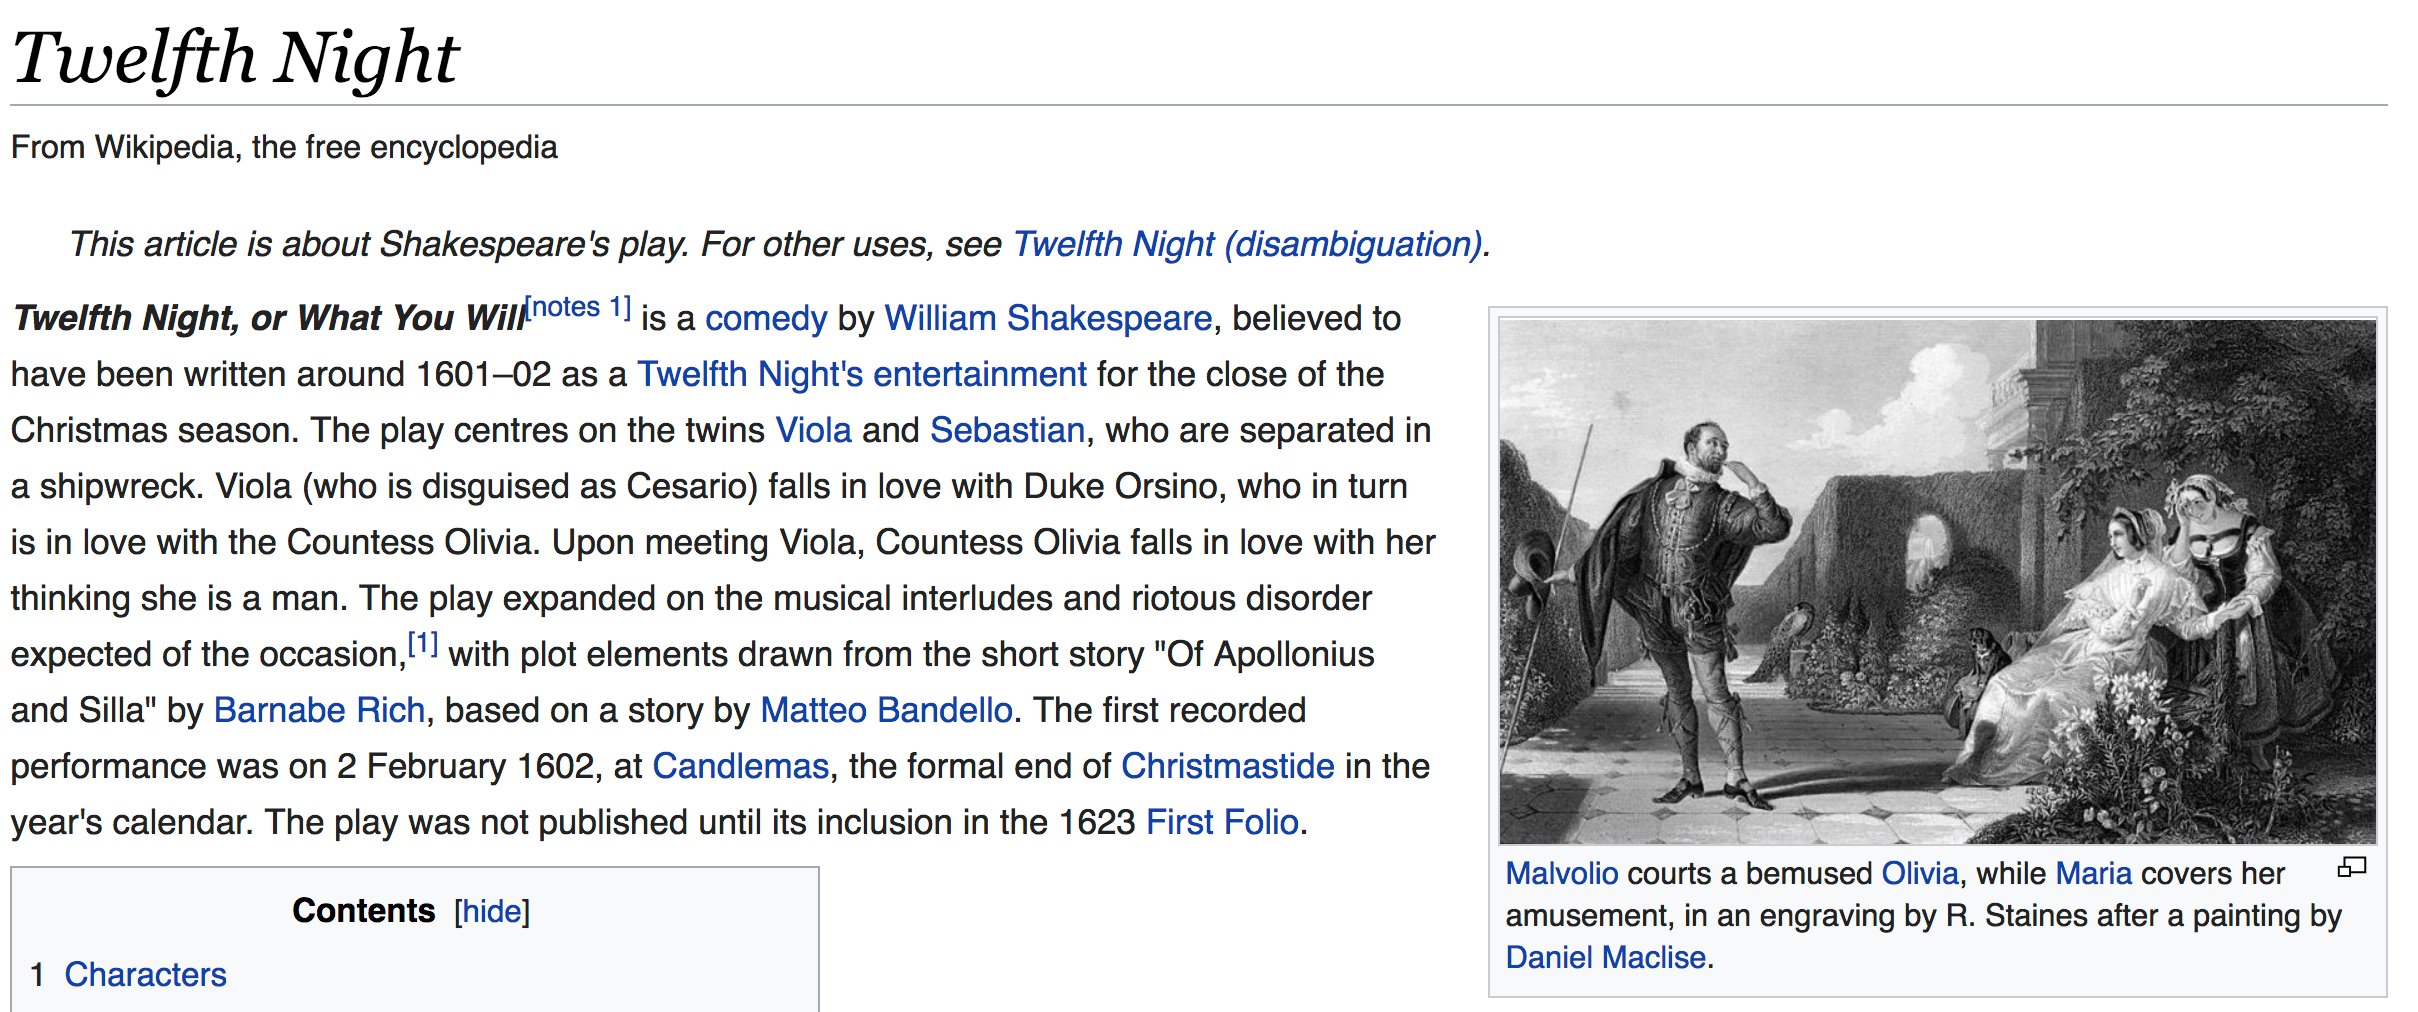

<img src="11-shak03.png"/>

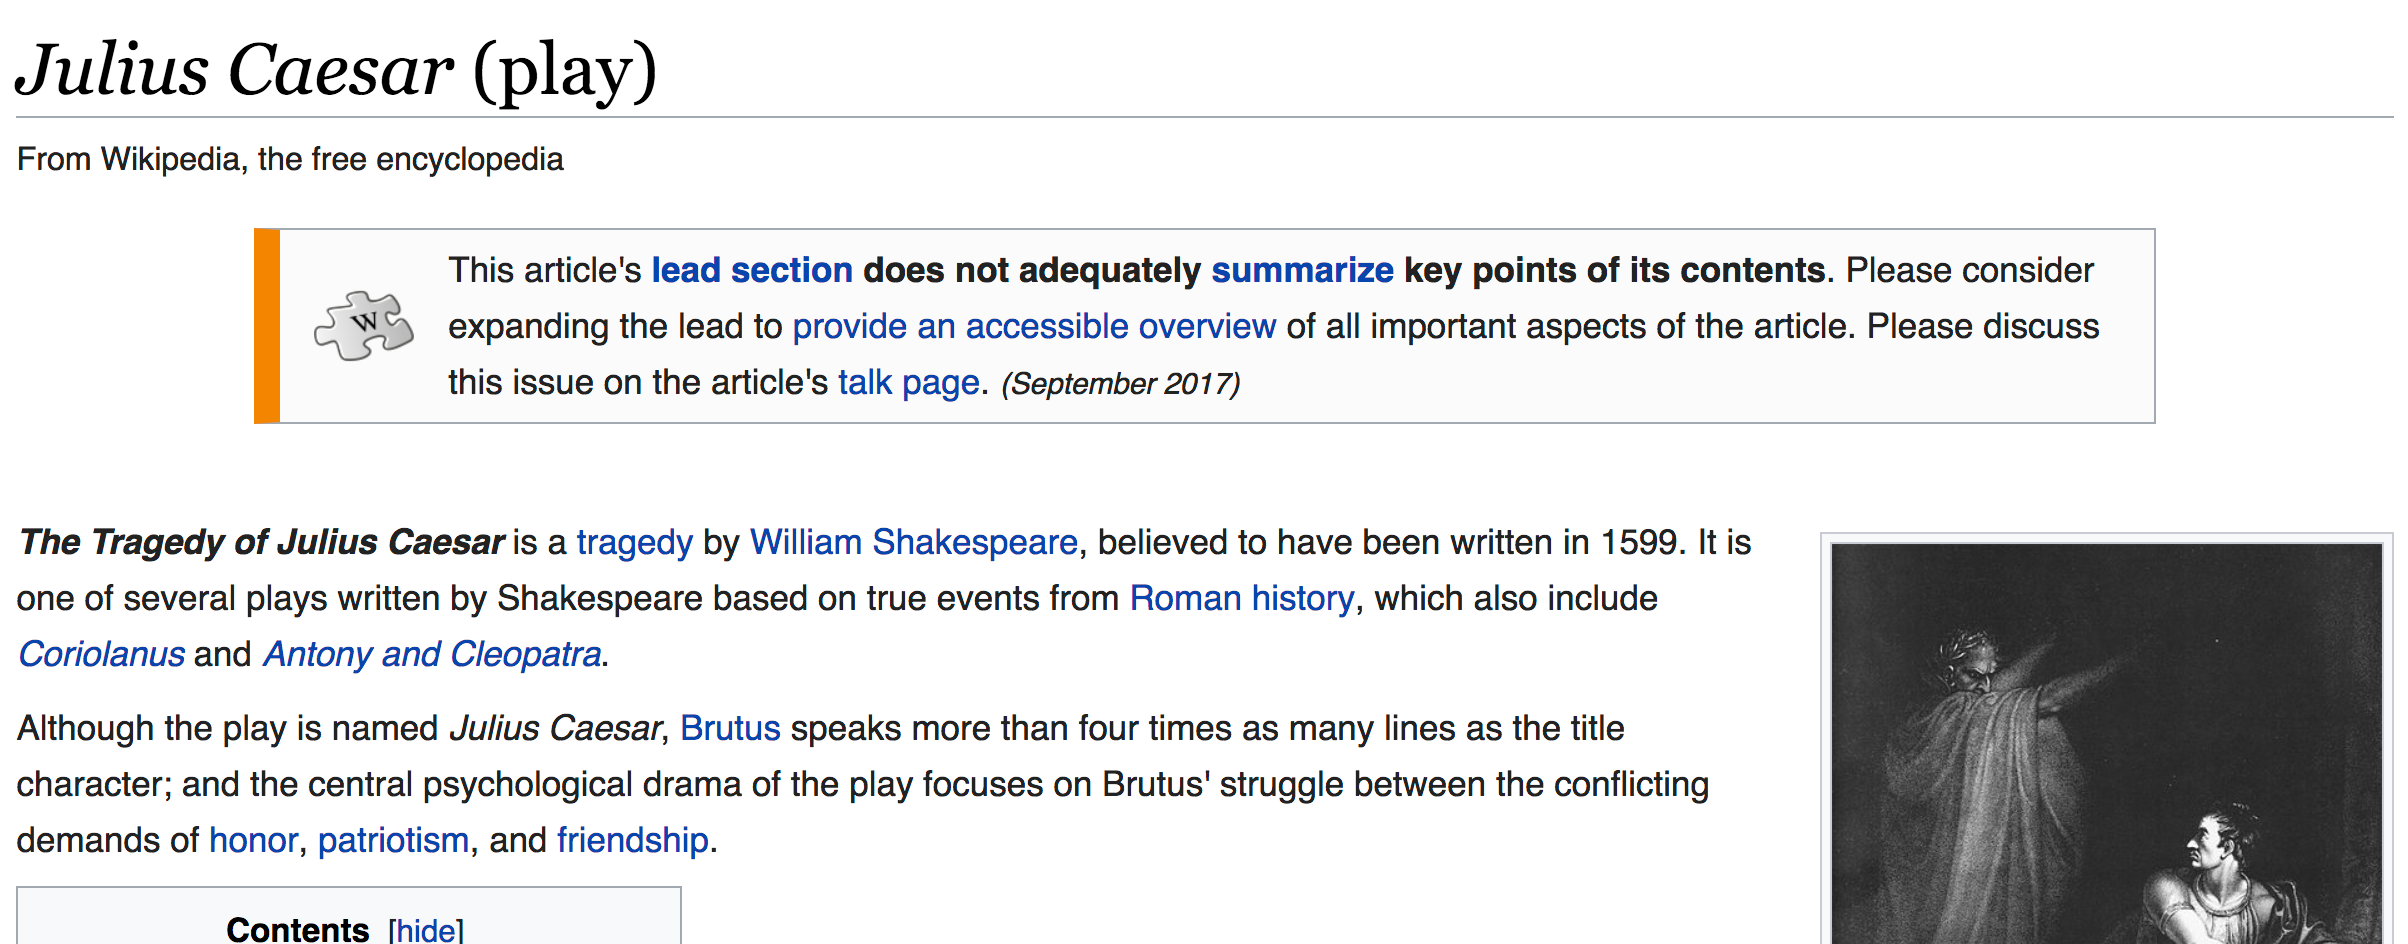

<img src="11-shak04.png"/>

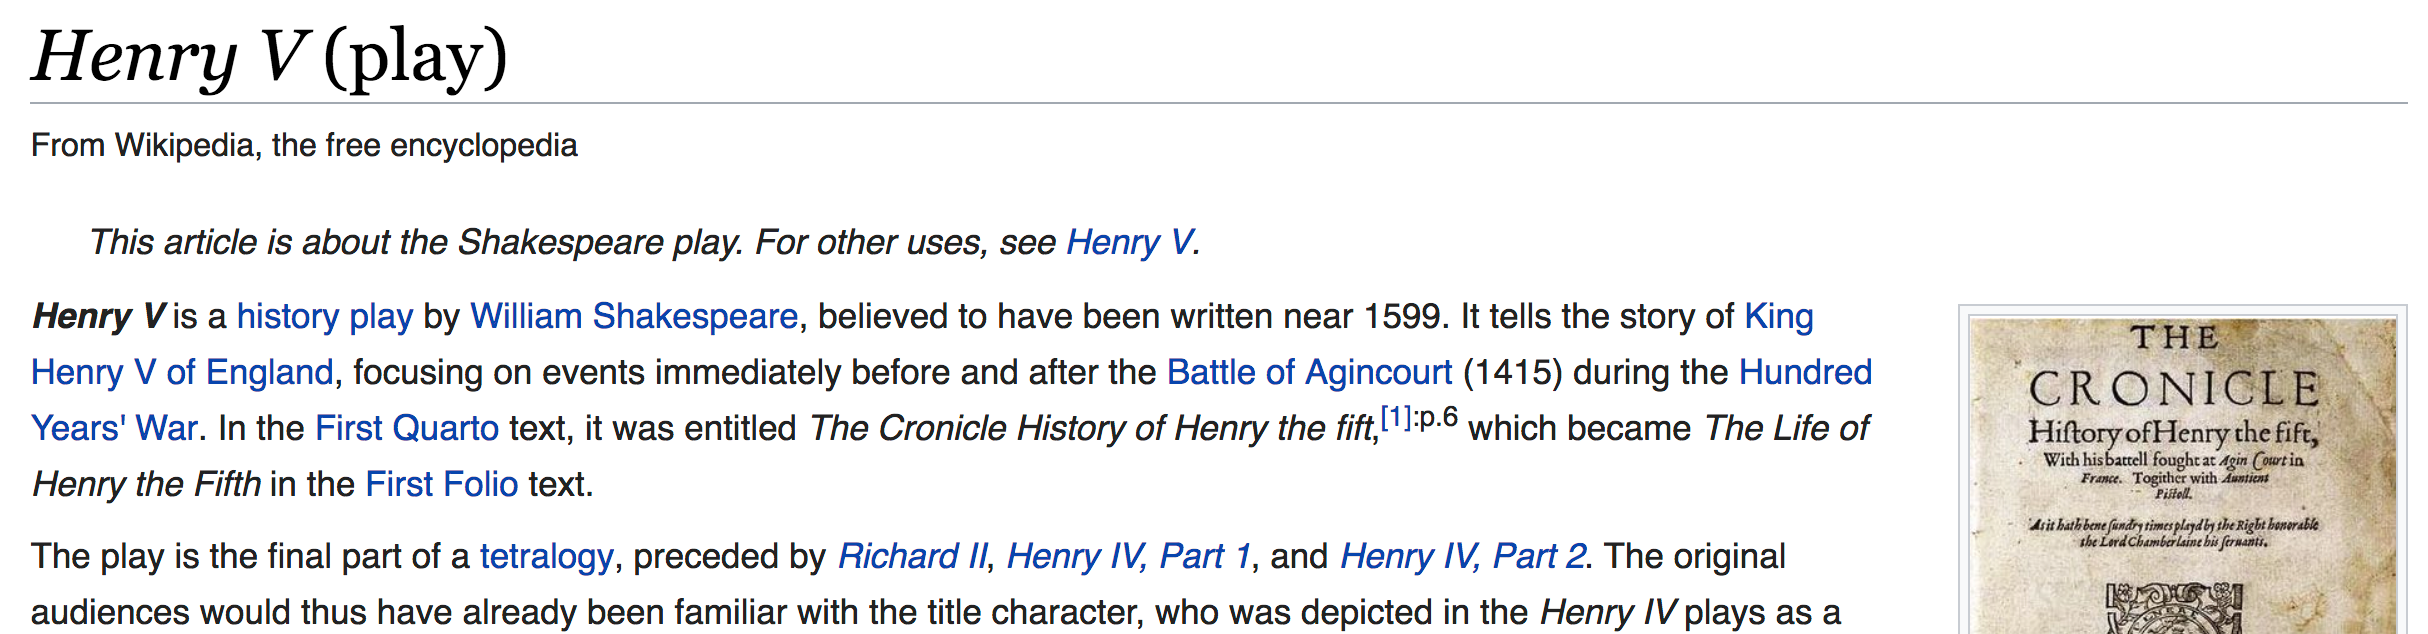

This is a popular way of representing documents and it is widely applied to the task of Information Retrieval.

### Not only for documents, but also for words

Those numbers make sense not only vertically, but also horizontally! So, we not only can represent the documents based on word occurrences, but we can also represent words based on how they appeared accross different documents.

In [33]:
word_doc_mat

,As You Like It,Twelfth Night,Julius Caesar,Henry V
battle,1,1,8,15
soldier,2,2,12,36
fool,37,58,1,5
clown,6,117,0,0


In [34]:
battle_arr = word_doc_mat.loc['battle'].values
soldier_arr = word_doc_mat.loc['soldier'].values
fool_arr = word_doc_mat.loc['fool'].values
clown_arr = word_doc_mat.loc['clown'].values

But how can we check the distance/similarity between two vectors?

A commonly used distance metric is the cosine similarity, which is defined by this formula:

$\text{similarity}(\mathbf{A}, \mathbf{B}) = \cos(\theta) = {\mathbf{A} \cdot \mathbf{B} \over \|\mathbf{A}\|_2 \|\mathbf{B}\|_2} $

$\mathbf{A} \cdot \mathbf{B} = \sum\limits_{i=1}^{n}{A_i  B_i}$

$\|\mathbf{A}\|_2 = \sqrt{\sum\limits_{i=1}^{n}{A_i^2}}$

$\|\mathbf{A}\|_2 = \sqrt{\sum\limits_{i=1}^{n}{A_i^2}} = \sqrt{\mathbf{A} \cdot \mathbf{A}} $

In [35]:
def cosine_similarity (a,b):
    #YOUR CODE HERE

print (cosine_similarity(battle_arr, soldier_arr))
print (cosine_similarity(battle_arr, fool_arr))
print (cosine_similarity(clown_arr, fool_arr))

0.9859370761530974
0.15125706024509525
0.867121718929621


In [36]:
print (cosine_similarity(battle_arr, soldier_arr))
print (cosine_similarity(battle_arr, fool_arr))

0.9859370761530974
0.15125706024509525


### Term-context matrix

So, until now we used the information about documents and words frequencies to represent both words and documents.

Imagine, though, that you get a large chunk of text without division into documents.

An alternative is to build a **TERM-CONTEXT** matrix

What is a term-context matrix?

Instead of the columns being documents, they can be a context. The context is usually smaller than a whole document (for instance, previous 4 words and next 4 words).

Example from SLP3:

```
is traditionally followed by       cherry        pie, a traditional dessert
often mixed, such as               strawberry    rhubarb pie. Apple pie
computer peripherals and personal  digital       assistants. These devices usually
a computer. This includes          information   available on the internet
```

Example from NLTK:

In [46]:
from nltk.corpus import gutenberg
from nltk.text import Text
corpus = gutenberg.words('melville-moby_dick.txt')
text = Text(corpus)

In [57]:
text.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


### Term-context matrix

The idea would be to write how often a term co-occurs with another within a predefined context.

In [15]:
b=[[0,0,0,1,0,1],[0,0,0,1,0,1],[0,2,1,0,1,0],[0,1,6,0,4,0]]
word_cont_mat = pd.DataFrame(b,index=['apricot', 'pineapple', 'data','information'], columns=['aardvark', 'computer', 'data', 'pinch', 'result','sugar'])
word_cont_mat

,aardvark,computer,data,pinch,result,sugar
apricot,0,0,0,1,0,1
pineapple,0,0,0,1,0,1
data,0,2,1,0,1,0
information,0,1,6,0,4,0


We can define a context to be

 * the previous and next word (2L context words, where L=1)
 * the previous two and the next two (2L context words, where L=2)
 * ...

### Why don't we work with a real world example?

We will use the Brown corpus.

(From NLTK) The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University. This corpus contains text from 500 sources, and the sources have been categorized by genre, such as news, editorial, and so on.

In [59]:
from nltk.corpus import brown

In [60]:
#I create a list of sentences, joining all the words appearing in each sentence with a space

brown_text = [" ".join(sent) for sent in brown.sents()]

In [61]:
len(brown_text)

57340

Check some examples:

In [64]:
print (brown_text[10])
print ()
print (brown_text[20])
print ()
print (brown_text[30])

It urged that the city `` take steps to remedy '' this problem .

The jury said it found the court `` has incorporated into its operating procedures the recommendations '' of two previous grand juries , the Atlanta Bar Association and an interim citizens committee .

Mayor William B. Hartsfield filed suit for divorce from his wife , Pearl Williams Hartsfield , in Fulton Superior Court Friday .


Let's build a Term-Context matrix, considering each sentence to be the context.

How can we do it? Think about how we can get this (10 mins to think, 20 mins to implement)

In [ ]:
#YOUR IDEAS/CODE HERE

#Avoid looking to my approach (below). You may have a better idea :-)

#It is not easy, but it is good to think about how you would solve this problem

My approach:

 * Get word frequencies for each document (sentence)
 * For each word_orig
    * Check all documents that contain that word
    * For each word_two
       * Count how often a word_two appears in each document and save the sum
    * This is the no. of times that word_orig and word_two cooccur together

#### How would this look like?

In [123]:
example = pd.DataFrame(brown_text_transformed.toarray()[:10],
                       columns=sorted(cv.vocabulary_),
                      index = ["sent"+str(i) for i in range(10)])

Imagine we have something like this (well, not very informative)

In [124]:
example

,00,000,001,002,005,01,014,018,02,025,...,zorrillas,zounds,zq,zu,zubkovskaya,zur,zurcher,zurich,zwei,zworykin
sent0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sent1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sent2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sent3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sent4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sent5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sent6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sent7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sent8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sent9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Better imagine we have something like this (I just selected some specific columns)

In [127]:
example[['the','county','and','atlanta','planned','investigation']]

,the,county,and,atlanta,planned,investigation
sent0,1,1,0,1,0,1
sent1,7,0,1,1,0,0
sent2,2,0,0,0,0,0
sent3,5,0,1,0,0,0
sent4,1,0,2,0,0,0
sent5,1,0,2,0,0,0
sent6,3,1,2,1,0,0
sent7,0,0,0,0,0,0
sent8,2,0,1,0,0,0
sent9,2,0,0,0,0,0


So, let's check an example:

In [125]:
brown_text[1]

"The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise and thanks of the City of Atlanta '' for the manner in which the election was conducted ."

In [127]:
example[['the','county','and','atlanta','planned','investigation']]

,the,county,and,atlanta,planned,investigation
sent0,1,1,0,1,0,1
sent1,7,0,1,1,0,0
sent2,2,0,0,0,0,0
sent3,5,0,1,0,0,0
sent4,1,0,2,0,0,0
sent5,1,0,2,0,0,0
sent6,3,1,2,1,0,0
sent7,0,0,0,0,0,0
sent8,2,0,1,0,0,0
sent9,2,0,0,0,0,0


#### Next question

How can we build a context vector for a word, for instance, `investigation`?

We want to count how often the term co-occurs with others in specific contexts.

In [128]:
w2idx["investigation"]

20385

In [129]:
sentences_with_word = brown_text_transformed[:,w2idx["investigation"]].toarray().reshape(-1)
brown_text_transformed[sentences_with_word>=1]

<51x42396 sparse matrix of type '<class 'numpy.int64'>'
	with 1098 stored elements in Compressed Sparse Row format>

We know that 51 sentences contain the word investigation.

We have a matrix of 51 rows (sentences) and 42,396 columns (vocab size).

How can we get how often a word co-occurs with the word investigation?

In [ ]:
#YOUR CODE HERE

This shows a very long vector (42,396 elements). It tells us how often each word in the vocabulary co-occurs with the word `investigation`.

We would like to know which are the most relevant words, though.

Which do you believe that will be the most relevant words?

The largest ones could be very relevant, as we know that co-occur with our word of interest.

But how to get the largest numbers?

We can use the argsort function, which will sort the content of the vector, and instead of returning the sorted values, it will return the sorted indices. For instance:

In [135]:
vec = [7,2,4,3]

np.argsort(vec)

array([1, 3, 2, 0])

Let's sort our co-occurring word count vector.

In [137]:
sorted_idx = np.argsort(context_vector_word).reshape(-1)
sorted_idx

array([    0, 28165, 28166, ..., 20385, 26297, 37930])

These are the words that co-occur the most with the word `investigation`.

In [138]:
for idx in sorted_idx[-20:]:
    print (idx2w[idx])

this
be
not
an
bureau
for
federal
with
at
as
was
by
that
he
in
and
to
investigation
of
the


These are the words that co-occur the least with the word `investigation`.

In [140]:
for idx in sorted_idx[:20]:
    print (idx2w[idx])

00
philosophers
philosophic
philosophically
philosophies
philosophized
philosophizing
philosophy
philosopher
phineoppus
phis
phloem
phobic
phone
phoned
phonemes
phonemic
phipps
philology
philologists


Any problem in the obtained result?

Frequency is clearly useful; if sugar appears a lot near apricot, that's useful information.

But overly frequent words like "the", "it", or "they" are  not very informative about the context

Need a function that resolves this frequency paradox!

### Tf-Idf

#### tf: term frequency

$$\mathrm { tf } _ { t , d } = \left\{ \begin{array} { l l } { 1 +  \operatorname { count } ( t , d ) } & { \text { if } \operatorname { count } ( t , d ) > 0 } \\ { 0 } & { \text { otherwise } } \end{array} \right.$$

#### idf: inverse document frequency (usually log-transformed)

$$\mathrm { idf } _ { i } = \log_{10} \left( \frac { N } { \mathrm { d } \mathrm { f } _ { i } } \right)$$

where $N$ is the total number of documents in the collection and $df_i$ is the total number of documents that have the word $i$.

<center>"the" or "good" have very low inverse document frequency.</center>

And then the tf-idf for word $t$ in document $d$ is defined as:

$$w _ { t , d } = \mathrm { tf } _ { t , d } \times \mathrm { idf } _ { t }$$

In [1]:
from tqdm import tqdm
import pickle
import math

### Exercise:

Normalize the vector for the word `investigation` in the brown corpus by using inverse document frequency.

In order to do that, we need to know how much each word should be normalized. We need to know how often one word appears in the documents. Therefore, we need to create a dictionary that will save the Inverse document frequency for each word.

Can you calculate the inverse document frequency of the word `investigation`?

In [ ]:
#YOUR COODE HERE

If you want to see the IDFs that I calculated by myself, please download the `vocab.pickle` and `idfs.pickle` files from Absalon and place them in the directory where you have this notebook.

In [2]:
f= open("vocab.pickle","rb")
cv = pickle.load(f)
f.close()

f= open("idfs.pickle","rb")
idf = pickle.load(f)
f.close()

In [3]:
idf["rapid"]

3.105245174835122

In [4]:
idf['the']

-0.08665896362561368

In [6]:
idf['investigation']

3.050887512512529

In [14]:
idf['mountain']

3.2399437487325784

After you calculated the inverse document frequency for the word `investigation`, can you calculate the tf-idf-normalized context vector for the word `investigation`?

And then, can you check which are the words with highest and lowest weight after normalizing? Are they the same  as before? Are they better? Are they worse?

In [ ]:
#YOUR CODE HERE